## Munge 1 Notebook by: 

### Author: Christopher Streich, cjs6762nyu.edu, 
### for PUI2016 Final, 12-17-2016

## This notebook is designed to run on the PUI2016_Python2 Kernel. 

This notebook will Begin the overall Munging Phase. 

It may be replaced by a Notebook which only solves #1 and #2



In [1]:
#Tools for import
import numpy as np
import pandas as pd
import geopandas as gp
import scipy.cluster as scp
import shapely as shp
import pylab as pl
import pandas as pd
import matplotlib.pylab as plt
import scipy.cluster as scp
import plotly.plotly as py

from datetime import datetime
from itertools import compress
from fiona.crs import from_epsg
from sklearn.cluster import KMeans
#from matplotlib import cm
from descartes import PolygonPatch
from pandas.io.common import ZipFile
from sklearn.cluster import AgglomerativeClustering
from IPython.html import widgets
from IPython.display import display

import seaborn
import fiona
import zipfile
import os
import subprocess

%matplotlib inline
%pylab inline

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning:

The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.



Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['plt', 'compress', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy



In [63]:
#from lxml import etree

import numpy as np

import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep
from pysal.esda.mapclassify import Natural_Breaks as nb


from itertools import chain

In [2]:
%matplotlib inline


from pandas import DataFrame


from geopandas import GeoDataFrame

import fiona
import shapely
import os
import pylab as pl


### List of Variables defined in this notebook

nycb2010.shp = NYC Census Tract shapefile

ZIP_CODE_040114.shp = NYC zipcode shapefile

nybb.shp = Borough Map

zbp00totals.txt = yr2000 Biz Data 

zbp00totals.txt = yr2010 Biz Data.

zc_shape = NYC geoJson

biz2000 = Businesses in 2000 in NYC zipcodes by zipcode

biz2010 = Businesses in 2000 in NYC zipcodes by zipcode

postalcodes = Unique NYC Postal Codes. 

zc_shp_area = shapefile with calculated area (mi^2)

zc_group = Zip Codes grouped by zipcode with summed area(mi^2)

### Stats after raw import

len(zip_shp) = 263

len(zip_shp.ZIPCODE.unique()) = 248

len(tract_shp) = 38794

len(boro_shp) = 5

len(zc_shape) = 262

len(zc_shape.postalCode.unique()) = 247

len(biz2000) = 239

len(biz2010) = 239

len(postalcodes) = 247




### ZipCode Shapefile

In [3]:
zip_shape_path = (os.getenv("PUIDATA") + "/" + "ZIP_CODE_040114.shp")
zip_shp = gp.read_file(zip_shape_path)

In [4]:
zip_shp.head(2)

,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,geometry
0,2.269930e+07,0,Queens,081,18681.0,Jamaica,0.0,0.0,NY,36,http://www.usps.com/,11436,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,2.963100e+07,0,Kings,047,62426.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11213,"POLYGON ((1001613.712964058 186926.4395172149,..."


In [5]:
len(zip_shp)

263

In [6]:
len(zip_shp.ZIPCODE.unique())

248

### Census tract Shapefile

In [7]:
tract_shape_path = (os.getenv("PUIDATA") + "/" + "nycb2010_16c/nycb2010.shp")
tract_shp = gp.read_file(tract_shape_path)

In [8]:
tract_shp.head(2)

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."


In [9]:
len(tract_shp)

38794

### Borough SHapefile

In [10]:
tract_shape_path = (os.getenv("PUIDATA") + "/" + "nybb_16d/nybb.shp")
boro_shp = gp.read_file(tract_shape_path)

In [11]:
boro_shp.head(2)

,BoroCode,BoroName,Shape_Area,Shape_Leng,geometry
0,5,Staten Island,1.623819e+09,330476.02653,(POLYGON ((970217.0223999023 145643.3322143555...
1,2,Bronx,1.186816e+09,464081.17775,(POLYGON ((1012821.805786133 229228.2645874023...


In [12]:
len(boro_shp)

5

### Zip Code GeoJson

ref: (https://stackoverflow.com/questions/21546739/load-data-from-txt-with-pandas)

### GeoJson used in Assignemnt 11

In [13]:
zc_shape = gp.read_file(os.getenv('PUIDATA') + '/' + 'nyc-zip-code-tabulation-areas-polygons.geojson')

In [14]:
zc_shape.head(5)

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,postalCode
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,2.016328e+07,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,2.260653e+07,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6.269333e+06,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,4.941836e+07,35932.810639,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,6.938587e+07,38693.565676,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365


In [15]:
len(zc_shape)


262

In [16]:
len(zc_shape.postalCode.unique())

247

## Number of unique NYC Zips

In [17]:
postalcodes = (zc_shape.postalCode.unique())

In [18]:
postalcodes.dtype

dtype('O')

In [19]:
len(postalcodes)

247

In [20]:
map(str, postalcodes)

['11372',
 '11004',
 '11040',
 '11426',
 '11365',
 '11373',
 '11001',
 '11375',
 '11427',
 '11374',
 '11366',
 '11423',
 '11428',
 '11432',
 '11379',
 '11429',
 '11435',
 '11415',
 '11418',
 '11433',
 '11451',
 '11221',
 '11421',
 '11419',
 '11434',
 '11216',
 '11416',
 '11233',
 '11436',
 '11213',
 '11212',
 '11225',
 '11218',
 '11226',
 '11219',
 '11210',
 '11230',
 '11204',
 '10471',
 '10470',
 '10466',
 '10467',
 '10463',
 '10475',
 '10464',
 '10469',
 '10468',
 '10458',
 '10034',
 '10033',
 '10462',
 '10040',
 '10453',
 '10465',
 '10461',
 '10457',
 '10460',
 '10032',
 '10452',
 '10456',
 '10472',
 '10031',
 '10039',
 '10459',
 '10451',
 '10473',
 '10030',
 '10027',
 '10474',
 '10455',
 '10037',
 '10024',
 '10454',
 '10026',
 '10035',
 '10025',
 '11357',
 '10029',
 '00083',
 '11356',
 '11359',
 '11360',
 '11105',
 '10128',
 '11371',
 '10023',
 '11363',
 '10028',
 '11354',
 '11102',
 '11370',
 '10021',
 '11361',
 '11358',
 '11362',
 '10044',
 '11369',
 '11103',
 '11106',
 '11368',


In [21]:
len(postalcodes)

247

In [22]:
postalcodes.dtype

dtype('O')

### Biz 2000

In [23]:
# Load year 2000 into dataframe

filename = 'zbp00totals.zip'
zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/' + filename)
df = pd.read_csv(zf.open(filename.replace('.zip','.txt')))
df.columns = [x.lower() for x in df.columns]
df['zip'] = df['zip'].astype(str)
df['year'] = 2000
df['est2000'] = df['est']
df  = df[df['zip'].isin(postalcodes)]
biz2000 = df[['zip', 'est2000', 'year']]
biz2000.reset_index(inplace=True)
biz2000.drop('index', axis=1, inplace=True)


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [24]:
biz2000.head(5) 

,zip,est2000,year
0,10001,7317,2000
1,10002,2277,2000
2,10003,3683,2000
3,10004,1294,2000
4,10005,1287,2000


In [25]:
len(biz2000)

239

Check For Null

In [26]:
 biz2000.isnull().any()

zip        False
est2000    False
year       False
dtype: bool

Count Number of Businesses in 2000 

In [27]:
np.sum(biz2000, axis=0).astype(int)

zip       -9223372036854775808
est2000                 204505
year                    478000
dtype: int64

# --> In 2000 there were 204505 buisnesses in NYC zip codes <--

### Biz 2010

In [28]:
# Load year 2010 into dataframe

filename10 = 'zbp10totals.zip'
zf10 = zipfile.ZipFile(os.getenv('PUIDATA') + '/' + filename10)
df10 = pd.read_csv(zf10.open(filename10.replace('.zip','.txt')))
df10.columns = [x.lower() for x in df10.columns]
df10['zip'] = df10['zip'].astype(str)
df10['year'] = 2010
df10['est2010'] = df10['est']
df10 = df10[df10['zip'].isin(postalcodes)]
biz2010 = df10[['zip', 'est2010', 'year']]
biz2010.reset_index(inplace=True)
biz2010.drop('index', axis=1, inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [29]:
biz2010.head(5) 

,zip,est2010,year
0,10001,7241,2010
1,10002,2872,2010
2,10003,4113,2010
3,10004,1398,2010
4,10005,1266,2010


In [30]:
len(biz2010)

241

Check for Null

In [31]:
 biz2010.isnull().any()

zip        False
est2010    False
year       False
dtype: bool

Count Number of Businesses in 2010 

In [32]:
biz2010.sum(axis = 0)

zip                 inf
est2010    2.215170e+05
year       4.844100e+05
dtype: float64

In [33]:
np.sum(biz2010, axis=0).astype(int)

zip       -9223372036854775808
est2010                 221517
year                    484410
dtype: int64

 # -->In 2010 there were 221517 buisness establishments in NYC zipcodes<--

### merge 2010 and 2000 biz data with zip code file. 


### Prepare the zipcode file. (using the zc_shapes df. Source =  GeoJson used in Assignemnt 11)

Plan = Get the area per zipcode including duplicates (262 shapes) then groupby zipcode and add area to get the total
area

Area

In [34]:
# set coordinate projection 
zc_shape.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N |
# set to miles
zc_shp_area = zc_shape.to_crs(epsg=2263).geometry.area.sum()/(2.788*10**7) # from ft2 to mi2

In [35]:
#sanity check
print 'total NYC land area: %s (mi^2)'%str(zc_shp_area)[:5] # from ft2 to mi2 #epsg=2263 is US feet

total NYC land area: 300.1 (mi^2)


In [36]:
zc_shape.head(5)

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,postalCode
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,2.016328e+07,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,2.260653e+07,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6.269333e+06,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,4.941836e+07,35932.810639,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,6.938587e+07,38693.565676,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365


In [37]:
zc_shape['area'] = zc_shape['geometry'].to_crs(epsg=2263).area /(2.788*10**7) # from ft2 to mi2

In [38]:
zc_shape.head(5)

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,postalCode,area
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,2.016328e+07,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372,0.724037
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,2.260653e+07,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004,0.811527
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6.269333e+06,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040,0.224615
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,4.941836e+07,35932.810639,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426,1.771526
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,6.938587e+07,38693.565676,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365,2.490261


In [39]:
np.sum(zc_shape, axis=0).astype(int)

BLDGpostalCode            57
OBJECTID               34453
Shape_Area        8367606492
Shape_Leng           6570529
area                     300
dtype: int64

Set new dataframe

In [40]:
zc_shape.columns



Index([           u'@id', u'BLDGpostalCode',       u'CTY_FIPS',
             u'OBJECTID',        u'PO_NAME',          u'STATE',
              u'ST_FIPS',     u'Shape_Area',     u'Shape_Leng',
              u'borough',       u'geometry',     u'postalCode',
                 u'area'],
      dtype='object')

In [41]:
zc_shp_area = zc_shape

In [42]:
zc_shp_area = zc_shape.drop([u'@id', u'BLDGpostalCode', u'OBJECTID', u'STATE', u'Shape_Area', u'Shape_Leng'], axis = 1)

In [43]:
zc_shp_area.columns

Index([  u'CTY_FIPS',    u'PO_NAME',    u'ST_FIPS',    u'borough',
         u'geometry', u'postalCode',       u'area'],
      dtype='object')

Groupby zipcode and aggregate the area(mi^2)

Good ref: 


In [44]:
aggregations = {'CTY_FIPS' : 'first', 'PO_NAME': 'first','ST_FIPS': 'first','borough': 'first', 'geometry': 'first', 'area': sum}   
    
zc_group = zc_shp_area.groupby(['postalCode']).agg(aggregations)

In [45]:
len(zc_group)

247

In [46]:
zc_group.head(5)

,area,geometry,PO_NAME,CTY_FIPS,borough,ST_FIPS
postalCode,,,,,,
00083,1.371683,POLYGON ((-73.94922045816276 40.79690988348276...,Central Park,061,Manhattan,36
10001,0.639092,POLYGON ((-74.00827017711134 40.75258714368449...,New York,061,Manhattan,36
10002,0.943279,POLYGON ((-73.97441674489379 40.73642441865476...,New York,061,Manhattan,36
10003,0.559127,POLYGON ((-73.97986374196766 40.73497446573838...,New York,061,Manhattan,36
10004,0.481879,"POLYGON ((-74.00596661578348 40.7043243225291,...",New York,061,Manhattan,36


In [47]:
zc_group.reset_index(inplace=True)

In [48]:
len(zc_group.postalCode.unique())

247

## Merge the Biz files onto our new Zip Code file

### First biz 2000

In [49]:
#Check dtype
dtype(zc_group['postalCode'])

dtype('O')

In [50]:
dtype(biz2000['zip'])

dtype('O')

In [51]:
zip_biz2000 = pd.merge(zc_group, biz2000, left_on='postalCode', right_on='zip', how='right')

In [52]:
zip_biz2000.head(5)

,postalCode,area,geometry,PO_NAME,CTY_FIPS,borough,ST_FIPS,zip,est2000,year
0,10001,0.639092,POLYGON ((-74.00827017711134 40.75258714368449...,New York,061,Manhattan,36,10001,7317,2000
1,10002,0.943279,POLYGON ((-73.97441674489379 40.73642441865476...,New York,061,Manhattan,36,10002,2277,2000
2,10003,0.559127,POLYGON ((-73.97986374196766 40.73497446573838...,New York,061,Manhattan,36,10003,3683,2000
3,10004,0.481879,"POLYGON ((-74.00596661578348 40.7043243225291,...",New York,061,Manhattan,36,10004,1294,2000
4,10005,0.074666,"POLYGON ((-74.00596661578348 40.7043243225291,...",New York,061,Manhattan,36,10005,1287,2000


In [53]:
zip_biz2000.columns


Index([u'postalCode', u'area', u'geometry', u'PO_NAME', u'CTY_FIPS',
       u'borough', u'ST_FIPS', u'zip', u'est2000', u'year'],
      dtype='object')

In [54]:
#Clean
zip_biz2000 = zip_biz2000.drop([u'PO_NAME', u'year'], axis = 1)

In [55]:
#create Density field
zip_biz2000['densitybiz'] = (zip_biz2000['est2000'] / zip_biz2000['area'])

In [56]:
zip_biz2000.head(5)

,postalCode,area,geometry,CTY_FIPS,borough,ST_FIPS,zip,est2000,densitybiz
0,10001,0.639092,POLYGON ((-74.00827017711134 40.75258714368449...,061,Manhattan,36,10001,7317,11449.060979
1,10002,0.943279,POLYGON ((-73.97441674489379 40.73642441865476...,061,Manhattan,36,10002,2277,2413.920927
2,10003,0.559127,POLYGON ((-73.97986374196766 40.73497446573838...,061,Manhattan,36,10003,3683,6587.056749
3,10004,0.481879,"POLYGON ((-74.00596661578348 40.7043243225291,...",061,Manhattan,36,10004,1294,2685.324015
4,10005,0.074666,"POLYGON ((-74.00596661578348 40.7043243225291,...",061,Manhattan,36,10005,1287,17236.720450


### Second biz 2010

In [57]:
dtype(biz2010['zip'])

dtype('O')

In [58]:
zip_biz2010 = pd.merge(zc_group, biz2010, left_on='postalCode', right_on='zip', how='right')

In [59]:
#Clean
zip_biz2010 = zip_biz2010.drop([u'PO_NAME', u'year'], axis = 1)

In [60]:
#create Density field
zip_biz2010['densitybiz'] = (zip_biz2010['est2010'] / zip_biz2010['area'])

In [61]:
zip_biz2010.head(5)

,postalCode,area,geometry,CTY_FIPS,borough,ST_FIPS,zip,est2010,densitybiz
0,10001,0.639092,POLYGON ((-74.00827017711134 40.75258714368449...,061,Manhattan,36,10001,7241,11330.142210
1,10002,0.943279,POLYGON ((-73.97441674489379 40.73642441865476...,061,Manhattan,36,10002,2872,3044.699561
2,10003,0.559127,POLYGON ((-73.97986374196766 40.73497446573838...,061,Manhattan,36,10003,4113,7356.113063
3,10004,0.481879,"POLYGON ((-74.00596661578348 40.7043243225291,...",061,Manhattan,36,10004,1398,2901.146037
4,10005,0.074666,"POLYGON ((-74.00596661578348 40.7043243225291,...",061,Manhattan,36,10005,1266,16955.468602


Sanity Check zip_biz2010['area']) for 10005 =.07sqmi in our table

http://www.unitedstateszipcodes.org/10005/ lists 10005 as "Land Area 0.07 sq mi"

In [ ]:
geo_zipbiz2010 = gp

In [ ]:
#fedhere: color bar
#ax = gdf.plot(column='changes', colormap='RdGy',alpha = 1, axes=ax)
#vmin, vmax = min(gdf['changes'].values), \
            max(gdf['changes'].values)
#ax.axis('off')
#fig = ax.get_figure()
#cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
#sm = plt.cm.ScalarMappable(cmap='RdGy', norm=plt.Normalize(vmin=vmin, vmax=vmax))
#sm._A = []
#fig.colorbar(sm, cax=cax)

In [ ]:
#def choropleth(df, column, cmap = 'viridis', ax=None):

In [ ]:
Function to use 

In [64]:
shp = fiona.open((os.getenv("PUIDATA") + "/" + "nybb_16d/nybb.shp"))
bds = shp.bounds
shp.close()
extra = 0.01
ll = (bds[0], bds[1])
ur = (bds[2], bds[3])
coords = list(chain(ll, ur))
w, h = coords[2] - coords[0], coords[3] - coords[1]

ValueError: llcrnrlon must be between -360.000000 and 720.000000 degrees

In [69]:
def colorbar_index(ncolors, cmap, labels=None, **kwargs):
    """
    This is a convenience function to stop you making off-by-one errors
    Takes a standard colour ramp, and discretizes it,
    then draws a colour bar with correctly aligned labels
    """
    cmap = cmap_discretize(cmap, ncolors)
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    if labels:
        colorbar.set_ticklabels(labels)
    return colorbar

In [70]:
def cmap_discretize(cmap, N):
    """
    Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)

    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0., 0., 0., 0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N + 1)
    cdict = {}
    for ki, key in enumerate(('red', 'green', 'blue')):
        cdict[key] = [(indices[i], colors_rgba[i - 1, ki], colors_rgba[i, ki]) for i in xrange(N + 1)]
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d" % N, cdict, 1024)

AttributeError: Unknown property column

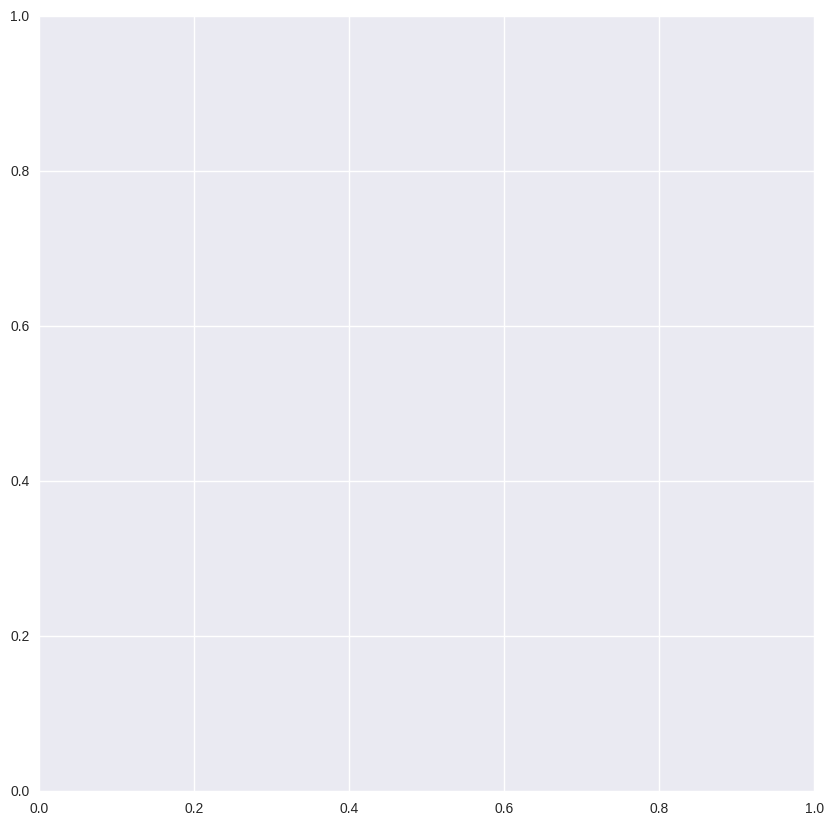

In [84]:
#Plot every 10th Census Tract
f, ax = plt.subplots(1, figsize = (10,10))
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)   


#Plot CUSP in red
#conv_ct_shape_BK[conv_ct_shape_BK['BCTCB2010'] == '30011001009'].plot(color='red', alpha=1, linewidth=1,ax=ax)    

#Plot every 10th. 
#zip_biz2010['densitybiz'].plot(color='black', alpha=.1,linewidth=0.1,ax=ax)
zip_biz2010.plot(column='densitybiz',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)

#plot point 
#ax.scatter(-73.98619262163143, 40.693753518938, s = 90, c = 'blue', alpha=.5)

#Label the Axis 
ax.legend(loc = 'best', fontsize=10)
ax.set_xlabel("Longitude", fontsize = 10)
ax.set_ylabel("Latitude", fontsize = 10)

#Title
plt.suptitle("Biz Density 2010", y = 1.05, fontsize = 18)
plt.title("attempt", fontsize = 10)